In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Admission_Predict_Ver1.1.csv')
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73


In [3]:
df.shape

(500, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [8]:
df.duplicated().sum()

0

In [9]:
df.drop('Serial No.',axis=1,inplace=True)

In [10]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [19]:
X = df.iloc[:,0:-1]
y = df.iloc[:,-1]

In [21]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=.2)

In [23]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.fit_transform(X_test)

In [25]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [47]:
model = Sequential()
model.add(Dense(7,activation='relu',input_dim=7))
model.add(Dense(7,activation='relu'))
model.add(Dense(1,activation='linear'))

In [48]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 7)                 56        
                                                                 
 dense_3 (Dense)             (None, 7)                 56        
                                                                 
 dense_4 (Dense)             (None, 1)                 8         
                                                                 
Total params: 120
Trainable params: 120
Non-trainable params: 0
_________________________________________________________________


In [71]:
model.compile(loss='mean_squared_error',optimizer='Adam')

In [72]:
history = model.fit(X_train_scaled,y_train,epochs=100,validation_split=.2)

Epoch 1/100


D:\jupyter\mynumpy\lib\site-packages\keras\engine\data_adapter.py:1696: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


10/10 [==============================] - 1s 23ms/step - loss: 0.0033 - val_loss: 0.0039
Epoch 2/100
10/10 [==============================] - 0s 8ms/step - loss: 0.0032 - val_loss: 0.0037
Epoch 3/100
10/10 [==============================] - 0s 7ms/step - loss: 0.0032 - val_loss: 0.0040
Epoch 4/100
10/10 [==============================] - 0s 9ms/step - loss: 0.0033 - val_loss: 0.0037
Epoch 5/100
10/10 [==============================] - 0s 7ms/step - loss: 0.0032 - val_loss: 0.0039
Epoch 6/100
10/10 [==============================] - 0s 9ms/step - loss: 0.0032 - val_loss: 0.0037
Epoch 7/100
10/10 [==============================] - 0s 7ms/step - loss: 0.0032 - val_loss: 0.0038
Epoch 8/100
10/10 [==============================] - 0s 6ms/step - loss: 0.0032 - val_loss: 0.0038
Epoch 9/100
10/10 [==============================] - 0s 6ms/step - loss: 0.0032 - val_loss: 0.0038
Epoch 10/100
10/10 [==============================] - 0s 6ms/step - loss: 0.0032 - val_loss: 0.0038
Epoch 11/100
10/10 [

10/10 [==============================] - 0s 6ms/step - loss: 0.0032 - val_loss: 0.0038
Epoch 84/100
10/10 [==============================] - 0s 6ms/step - loss: 0.0032 - val_loss: 0.0038
Epoch 85/100
10/10 [==============================] - 0s 8ms/step - loss: 0.0032 - val_loss: 0.0039
Epoch 86/100
10/10 [==============================] - 0s 8ms/step - loss: 0.0033 - val_loss: 0.0038
Epoch 87/100
10/10 [==============================] - 0s 8ms/step - loss: 0.0033 - val_loss: 0.0038
Epoch 88/100
10/10 [==============================] - 0s 7ms/step - loss: 0.0032 - val_loss: 0.0038
Epoch 89/100
10/10 [==============================] - 0s 7ms/step - loss: 0.0032 - val_loss: 0.0038
Epoch 90/100
10/10 [==============================] - 0s 7ms/step - loss: 0.0032 - val_loss: 0.0038
Epoch 91/100
10/10 [==============================] - 0s 7ms/step - loss: 0.0032 - val_loss: 0.0038
Epoch 92/100
10/10 [==============================] - 0s 6ms/step - loss: 0.0032 - val_loss: 0.0039
Epoch 93/100


In [73]:
y_pred = model.predict(X_test_scaled)

4/4 [==============================] - 0s 2ms/step


In [74]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.7837896530046544

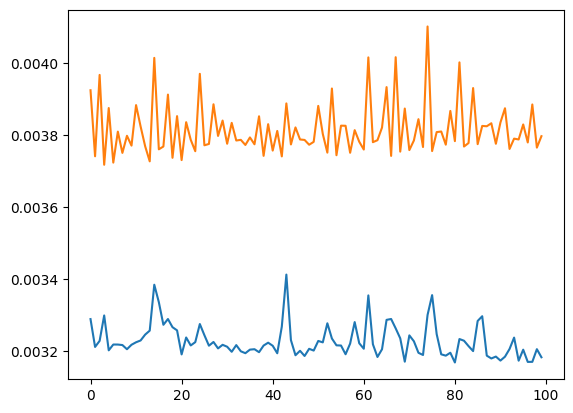

In [75]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [76]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

KeyError: 'accuracy'